In [19]:
from src.solver import Solver0D

In [20]:
x = Solver0D()
x.read_solver_file('../data/healthy/0080_0001/base_solver_files/0080_0001_model.in')

In [21]:
tree = x.get_vessel_tree()

In [22]:
tree.children[0].side

'rpa'

In [24]:
def compute_total_resistance(cur_node: Solver0D.Node):
    ''' computes total resistance/stenosis coefficients of a tree recursively
    '''
    
    if not cur_node.children:
        r_p = cur_node.vessel_info[0]['zero_d_element_values']['R_poiseuille']
        sc = cur_node.vessel_info[0]['zero_d_element_values']['stenosis_coefficient']
        return r_p, sc
    
    total_inv_res = 0
    total_inv_sc = 0
    for child_node in cur_node.children:
        r_p_child, sc_child = compute_total_resistance(child_node)
        if r_p_child != 0:
            total_inv_res += 1/r_p_child
        if sc_child != 0:
            total_inv_sc += 1/sc_child
    total_child_res = 1/total_inv_res
    total_child_sc = 1/ total_inv_sc
    
    r_p = cur_node.vessel_info[0]['zero_d_element_values']['R_poiseuille'] + total_child_res
    sc = cur_node.vessel_info[0]['zero_d_element_values']['stenosis_coefficient'] + total_child_sc
    return r_p, sc


    
        

def compute_lpa_rpa_resistances(dummy_solver: Solver0D ):
    ''' computes LPA and RPA resistances from each branch
    '''
        
    # get tree
    vessel_tree = dummy_solver.get_vessel_tree()
    assert len(vessel_tree.children) == 2, 'Pulmonary vasculature should only branch into 2 sections, LPA and RPA'
    
    first_branch = vessel_tree.children[0]
    second_branch = vessel_tree.children[1]
    
    # follow the first branch till it finishes to determine which is LPA and which is RPA
    if first_branch.side == 'lpa':
        lpa = first_branch
        rpa = second_branch
    else:
        print(True)
        lpa = second_branch
        rpa = first_branch
    
    lpa_res, lpa_sc = compute_total_resistance(lpa)
    rpa_res, rpa_sc = compute_total_resistance(rpa)
    
    
    return lpa_res, lpa_sc, rpa_res, rpa_sc    

In [25]:
compute_lpa_rpa_resistances(x)

True


(4.301938160248982,
 0.006720849186968765,
 5.578715289718572,
 0.004715818848199389)

In [27]:
rpa = tree.children[0]
max_gen = 0
max_node = None
for node in x.tree_bfs_iterator(rpa):
    if node.generation > max_gen:
        max_gen = node.generation
        max_node = node

In [29]:
max_node.__dict__

{'vess_id': [139],
 'vessel_info': [{'vessel_id': 139,
   'vessel_length': 0.1133163787610899,
   'vessel_name': 'branch97_seg0',
   'zero_d_element_type': 'BloodVessel',
   'zero_d_element_values': {'C': 1.184502234869842e-08,
    'L': 1.4363668337394515,
    'R_poiseuille': 16.290190768477277,
    'stenosis_coefficient': 0.009707247347680057}}],
 'parent': 138,
 'children': [<src.solver.Solver0D.VesselNode at 0x7fc612dde550>],
 'generation': 10,
 'side': 'rpa'}

In [30]:
import os

In [35]:
for x in os.walk(top = '../data/healthy/0080_0001/base_solver_files/'):
    print(x)

('../data/healthy/0080_0001/base_solver_files/', ['artificial_stenosis', 'tuning_dir'], ['0080_0001_model.in', '0080_0001_model_branch_results.csv', 'inlet_face_names.dat', '0080_0001_model_branch_results.npy', 'CapInfo', 'outlet_mapping.dat', 'inflow.png', 'inflow.flow', 'model_centerlines.vtp', '0080_0001_model_inlet_pressures.png', 'inlet_mapping.dat', 'rcrt.dat', 'outlet_face_names.dat'])
('../data/healthy/0080_0001/base_solver_files/artificial_stenosis', ['proximal', '0'], [])
('../data/healthy/0080_0001/base_solver_files/artificial_stenosis/proximal', [], ['stenosis_vessels.dat', '0080_0001_model_proximal_sten.in', '0080_0001_model_proximal_sten_branch_results.csv', '0080_0001_model_proximal_sten_branch_results.npy', '0080_0001_model_proximal_sten_inlet_pressures.png'])
('../data/healthy/0080_0001/base_solver_files/artificial_stenosis/0', [], ['0080_0001_model_art_sten_inlet_pressures.png', 'stenosis_vessels.dat', '0080_0001_model_art_sten.in', '0080_0001_model_art_sten_branch_re

In [45]:
import numpy as np

In [48]:
x = np.loadtxt('../data/healthy/0082_0001/base_solver_files/inflow.flow')

In [49]:
np.trapz(x[:,1], x[:,0])/ (x[-1, 0] - x[0, 0]) * 60/1000

6.897197289978845

In [41]:
x = np.array([1, 2, 3, 4,])


In [44]:
x[np.where(x == 4)][0]

4

In [52]:

from common import rec_dict, get_dict
m=np.load('0d_3d_comparison.npy',allow_pickle=True).item()

In [78]:
for i in ['flow','pressure']:
    for j in m['0080_0001'][i]['cap'].keys():
        
        print(i, j, m['0080_0001'][i]['cap'][j]['rel']['all'])

flow sys 0.19945399000529626
flow dia 0.02763661943312155
flow avg 0.06256662713997714
flow max 0.2272192754067132
pressure sys 0.32150433925231764
pressure dia 0.04470493883766451
pressure avg 0.10115726385615212
pressure max 0.36837643203878595


In [79]:
import numpy as np

In [91]:
class dummy():
    def __init__(self):
        pass

In [92]:
x = [dummy, [2], [3]]

In [93]:
np.random.shuffle(x)

In [94]:
x

[[2], __main__.dummy, [3]]

In [1]:
from scipy.stats.qmc import Sobol

In [3]:
x = Sobol(5, scramble = False)

In [8]:
x.random_base2(4)

ValueError: The balance properties of Sobol' points require n to be a power of 2. 32 points have been previously generated, then: n=32+2**4=48. If you still want to do this, the function 'Sobol.random()' can be used.

In [15]:
def function():
    for i in range(10):
        yield i


In [18]:
function()

<generator object function at 0x7f82ba2875f0>

In [19]:
for i in function():
    print(i)

0
1
2
3
4
5
6
7
8
9


In [37]:
x = enumerate(function())

In [38]:

for i in range(11):
    print(next(x, None))

(0, 0)
(1, 1)
(2, 2)
(3, 3)
(4, 4)
(5, 5)
(6, 6)
(7, 7)
(8, 8)
(9, 9)
None


In [1]:
import numpy as np

In [3]:
np.array(range(5))[4:10]

array([4])

In [7]:
i = np.load('../data/healthy/0080_0001/jc_solver_dir_0/artificial_stenosis/Manual_0/training_data/input.npy')

In [8]:
o = np.load('../data/healthy/0080_0001/jc_solver_dir_0/artificial_stenosis/Manual_0/training_data/output.npy')

In [10]:
assert len(i) == len(o)

In [12]:
pip install torch.utils.data

ERROR: Could not find a version that satisfies the requirement torch.utils.data (from versions: none)
ERROR: No matching distribution found for torch.utils.data
Note: you may need to restart the kernel to use updated packages.


In [11]:
help(torch)

NameError: name 'torch' is not defined

In [2]:
from pathlib import Path

In [3]:
sfile = Path('../data/healthy/0080_0001/jc_solver_dir_0/artificial_stenosis/Manual_1/stenosis_vessels.dat')

In [5]:
from src.file_io import read_json, write_json

In [6]:
x = read_json(sfile)

In [8]:
import json

In [14]:
with open(sfile, 'w') as fio:
    json.dump(x, fio, indent = 4, sort_keys=True)

In [1]:

from src.data_org import ModelPath

In [2]:
from pathlib import Path

In [3]:
x = Path('../data/healthy/0080_0001')

In [4]:
x.name

'0080_0001'

In [5]:
t = ModelPath(root = x, model_type='healthy')


../data/healthy/0080_0001
../data/healthy/0080_0001
../data/healthy/0080_0001


In [6]:
t.model_root

PosixPath('../data/healthy/0080_0001')

In [7]:
t

model_root : 
	../data/healthy/0080_0001
root : 
	../data/healthy/0080_0001
type : 
	healthy
model_name : 
	0080_0001
config_files : 
	../data/healthy/0080_0001/config_files
dev_config : 
	../data/healthy/0080_0001/config_files/dev_config.ini
info : 
	defaultdict(<class 'dict'>, {'metadata': {'id': 'H-0', 'name': '0080_0001', 'age': '43', 'gender': 'F', 'condition': 'healthy'}, 'files': {'inflow': '../data/healthy/0080_0001/flow-files/inflow_3d.flow', 'rom_inflow': '../data/healthy/0080_0001/flow-files/inflow_1d.flow', 'mdl_file': '../data/healthy/0080_0001/Models/0080_0001.mdl', 'vtp_file': '../data/healthy/0080_0001/Meshes/0080_0001.vtp', 'cap_info': '../data/healthy/0080_0001/Models/CapInfo'}, 'model': {'inlet': 'inflow', 'lpa': 'LPA', 'rpa': 'RPA', 'units': 'cm'}})
centerline_dir : 
	../data/healthy/0080_0001/centerline_files
base_lpn_dir : 
	../data/healthy/0080_0001/base_lpn_files
base_lpn : 
	../data/healthy/0080_0001/base_lpn_files/0080_0001_lpn.in
model_centerlines : 
	../data

In [1]:
from src.flow import Inflow0D

In [4]:
x = Inflow0D.from_file('../data/healthy/0080_0001/base_solver_files/three_d_dir/inflow.flow', smooth = True)

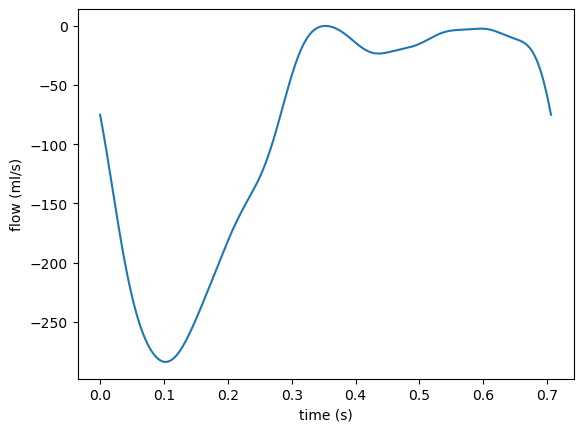

In [6]:
x.plot_flow('../images/0080_0001_inflow.png')